In [264]:
import matplotlib
matplotlib.use('TkAgg')
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from math import cos, sin, sqrt

# Exercice 1 : Transformations affines

In [22]:
def transformer (I , H , hw = ( -1 , -1) , interp ='linear'):
    h = hw [0]
    w = hw [1]
    if (w <= 0 or h <= 0) :
        (h , w) = hw = I.shape [:2]
    O = np.zeros ((h ,w) ) # image de sortie
    xx1 , yy1 = np.meshgrid ( np.arange (I.shape [1]) , np.arange ( I.shape [0]) )
    xx1 = xx1.flatten()
    yy1 = yy1.flatten()
    Hinv = np.linalg.inv ( H)
    xx2 , yy2 = np.meshgrid ( np.arange (O.shape [1]) , np.arange ( O.shape [0]) )
    xx2 = xx2.flatten()
    yy2 = yy2.flatten()
    xxyy2 = np.stack (( xx2 , yy2 , np.ones (( O.size ))) , axis =0)
    xxyy = Hinv @ xxyy2
    xxyy = np.stack (( xxyy [0]/ xxyy [2] , xxyy [1]/ xxyy [2]) , axis =0)
    O = griddata (( xx1 , yy1 ) , I.flatten() , xxyy.T , method = interp , fill_value =0).reshape(O.shape )
    
    return O

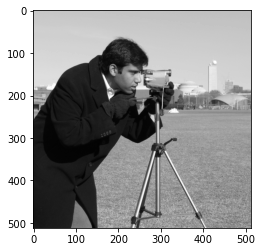

In [18]:
camera = data.camera()

plt.imshow(camera, cmap="gray")

In [27]:
def translationMatrix(Tx, Ty):
    return [
    [1,0,Tx],
    [0,1,Ty],
    [0,0,1]
    ]

In [28]:
H = translationMatrix(10, 20)

newCamera = transformer(camera, H)
plt.imshow(newCamera, cmap="gray")

In [34]:
def scaleMatrix(x0, y0, r):
    mat1 = np.array([[1,0,x0], [0,1,y0], [0,0,1]])
    mat2 = np.array([[r,0,0], [0,r,0], [0,0,1]])
    mat3 = np.array([[1,0,-x0], [0,1,-y0], [0,0,1]])

    return mat1@mat2@mat3

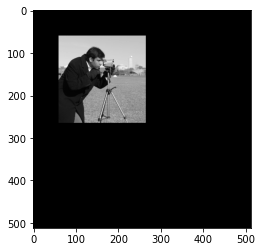

In [35]:
H = scaleMatrix(100, 100, 0.4)

newCamera = transformer(camera, H)
plt.imshow(newCamera, cmap="gray")

In [71]:
def rotateMatrix(x0,y0, alpha):
    alpha = 0.0174533*alpha
    mat1 = np.array([[1,0,x0], [0,1,y0], [0,0,1]])
    mat2 = np.array([[cos(alpha),sin(alpha),0],[-sin(alpha),cos(alpha),0],[0,0,1]])
    mat3 = np.array([[1,0,-x0], [0,1,-y0], [0,0,1]])

    return mat1@mat2@mat3

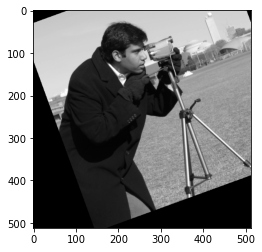

In [70]:
H = rotateMatrix(100, 100, 20)

newCamera = transformer(camera, H)
plt.imshow(newCamera, cmap="gray")

# Exercice 2 : Homographie

In [123]:
from matplotlib import image
from skimage.transform import estimate_transform

In [86]:
oggy = plt.imread('oggy_salon.jpg')

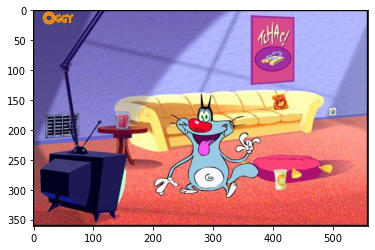

In [87]:
plt.imshow(oggy, cmap="gray")

In [231]:
def coinI(image):
    w,h = image.shape

    return np.array([
        [0,0],
        [w,0],
        [w,h],
        [0,h]
    ])

In [232]:
def coinO(image):
    plt.imshow(image)
    points = plt.ginput(4)

    return np.array(points)

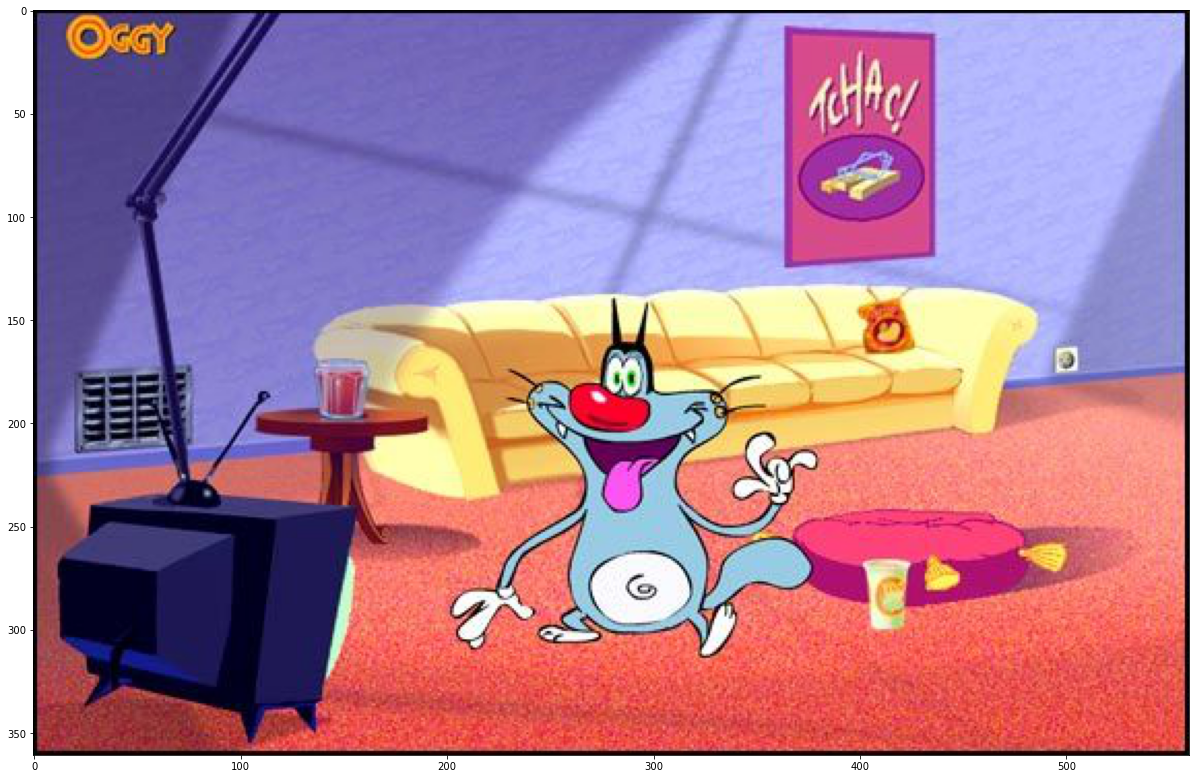

In [233]:
coinICamera = coinI(camera)
coinOOggy = coinO(oggy)

In [234]:
print(coinICamera)
print(coinOOggy)

[[  0   0]
 [512   0]
 [512 512]
 [  0 512]]
[[363.30871864   7.5223837 ]
 [436.45968115  10.91348793]
 [436.45968115 118.45993612]
 [363.30871864 123.30437073]]


In [235]:
tform = estimate_transform ('projective', coinICamera , coinOOggy )
H = tform.params

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 814, in callit
    func(*args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x00000214D3F60910>
Exception in Tkinter callback
Traceba

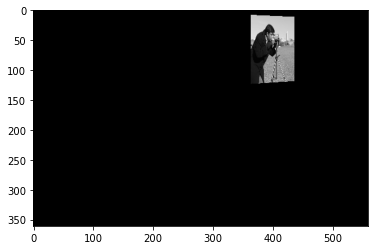

In [236]:
homoCamera = transformer(camera, H, hw=oggy.shape[0:2])
plt.imshow(homoCamera, cmap="gray")

In [237]:
zero = np.zeros(homoCamera.shape)
stacked_homoCamera = np.stack((homoCamera,homoCamera,homoCamera), axis=2).astype(int)

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 814, in callit
    func(*args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x00000214D3EBF7F0>
Exception in Tkinter callback
Traceba

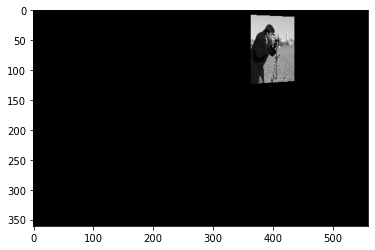

In [238]:
plt.imshow(stacked_homoCamera)

In [239]:
stacked_homoCamera.shape

(361, 560, 3)

In [240]:
merged = oggy.copy()

In [242]:
merged[stacked_homoCamera!=0]=0

In [243]:
merged = merged | stacked_homoCamera

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 814, in callit
    func(*args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x00000214D3AD5970>
Exception in Tkinter callback
Traceba

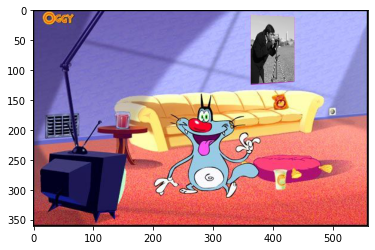

In [244]:
plt.imshow(merged)

# Exercice 3 : Transformation en coordonnées polaires

In [263]:
from skimage.color import rgb2gray

In [250]:
oldTown = plt.imread('oldtown.png')

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 814, in callit
    func(*args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x00000214F6128070>
Exception in Tkinter callback
Traceba

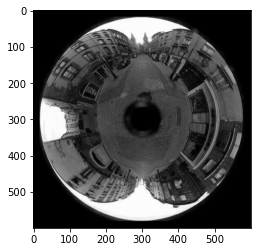

In [254]:
oldtownGrey = rgb2gray(oldTown)
plt.imshow(oldtownGrey, cmap="gray")

In [255]:
x0 = oldtownGrey.shape[0] % 2
y0 = oldtownGrey.shape[1] % 2

print(x0,y0)

0 0


In [259]:
xx1, yy1 = np.meshgrid(range(600),range(600))

In [261]:
print(xx1)

[[  0   1   2 ... 597 598 599]
 [  0   1   2 ... 597 598 599]
 [  0   1   2 ... 597 598 599]
 ...
 [  0   1   2 ... 597 598 599]
 [  0   1   2 ... 597 598 599]
 [  0   1   2 ... 597 598 599]]


In [260]:
xx2, yy2 = np.meshgrid(range(250),range(360))

In [271]:
def teta(x,y, x0, y0):
    return 2*np.arctan(y/x+sqrt((x-x0)^2 + (y-y0)^2))

In [272]:
def rayon(x,y,x0,y0):
    return sqrt((x-x0)^2 + (y-y0)^2)

In [274]:
sqrt((xx1-x0)^2 + (yy1-y0)^2) + cos(2*np.arctan(yy1/(xx1+sqrt((xx1-x0)^2 + (yy1-y0)^2))))

TypeError: only size-1 arrays can be converted to Python scalars